# Neural Network for Regression
## MANUAL

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create X data
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
# Create noise for Y data
noise = np.random.randn(len(x_data))

### Linear regerssion formula
### y = wx + b
#### b = 5

In [4]:
# Create Y data
y_true = (0.5 * x_data) + 5 + noise

In [5]:
# Data to DataFrame
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [6]:
# Concat two DataFrames
my_data = pd.concat([x_df, y_df], axis=1)

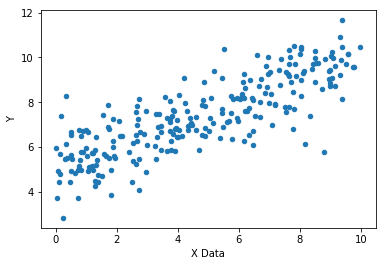

In [7]:
# Plot data
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [8]:
# Batch size
batch_size = 8

In [9]:
# Placeholders
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [10]:
# Variables
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [11]:
# Reggression formula
y_model = w*xph + b

In [12]:
# Loss function
error = tf.reduce_sum(tf.square(yph-y_model))

In [13]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# Minimize error
train = optimizer.minimize(error)

In [14]:
# Initializer
init = tf.global_variables_initializer()

In [15]:
# Empty lists for visualization
error_list = []
i_list = []
w_list = []
b_list = []

In [16]:
# Number of batches
batches = 1000

# Create session
with tf.Session() as sess:
    
    # Run initializer
    sess.run(init)
    
    # Training loop
    for i in range(batches):
        # Grab random samples
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        # Feed dictionary
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        # Append error to list
        error_list.append(sess.run([error], feed_dict = feed))
        # Append m to list
        w_list.append(sess.run([w]))
        # Append b to list
        b_list.append(sess.run([b]))
        # Append i to list
        i_list.append(i)
        
        # Train
        sess.run(train, feed_dict = feed)
    
    # Final model
    model_w, model_b = sess.run([w,b])

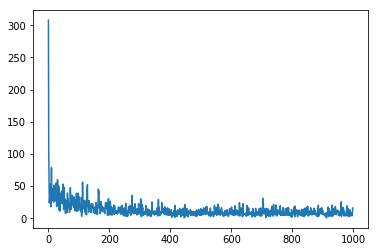

In [17]:
# Plot errors
plt.plot(i_list, error_list)

In [18]:
# Final w
model_w

0.4350711

In [19]:
# Final b
model_b

4.920881

In [20]:
# Prediction model
y_hat = x_data*model_w + model_b

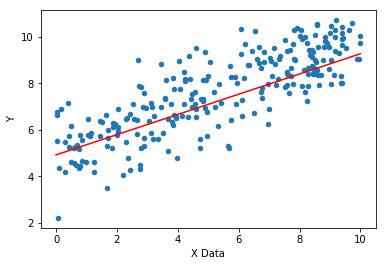

In [21]:
# Plot data
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
# Plot model line
plt.plot(x_data, y_hat, 'r')

## TF ESTIMATOR

In [22]:
# Create numeric column
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [ ]:
# Linear Regression estimator
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

In [24]:
# Split data for training and testing
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [25]:
# Input function to train
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [26]:
# Input function to test
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [ ]:
# Train estimator
estimator.train(input_fn=train_input_func, steps=1000)

In [ ]:
# Evaluate model
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

In [29]:
# Metrics for test data
print(eval_metrics)

{'average_loss': 1.0925242, 'label/mean': 7.4798546, 'loss': 8.740193, 'prediction/mean': 7.290221, 'global_step': 1000}


In [30]:
# Create new data
brand_new_data = np.linspace(0,10,10)
# Input function to predict
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [ ]:
# Predictions
preds = list(estimator.predict(input_fn=input_fn_predict))

In [36]:
# Grab only predictions

predictions = []

for pred in preds:
    predictions.append(pred['predictions'])

In [37]:
# Predictions
predictions

[array([4.4698887], dtype=float32),
 array([5.100905], dtype=float32),
 array([5.731921], dtype=float32),
 array([6.3629375], dtype=float32),
 array([6.9939537], dtype=float32),
 array([7.6249695], dtype=float32),
 array([8.255986], dtype=float32),
 array([8.887002], dtype=float32),
 array([9.518019], dtype=float32),
 array([10.1490345], dtype=float32)]

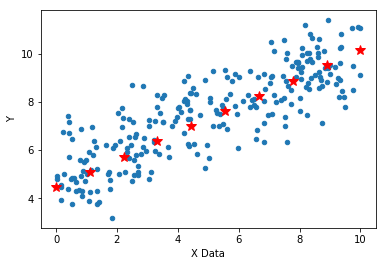

In [38]:
# Plot data
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
# Plot predictions
plt.plot(brand_new_data, predictions, 'r*', markersize=10)